In [0]:
import os
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x_test[0].shape

(28, 28)

In [0]:
from random import shuffle, random

In [0]:
def simg(img):
  ysize, xsize = img.shape
  result = np.ones((ysize, xsize))
  ysize = int(ysize/2)
  xsize = int(xsize/2)
  parts = []
  for i in range(2):
    for j in range(2):
      parts.append(img[ysize * i: ysize * (i+1), xsize * j: xsize * (j+1)])

  shuffle(parts)

  for num, i in enumerate(parts):
    result[ysize * int(num/2): ysize * (int(num/2) + 1), xsize * (num%2): xsize * ((num%2) + 1)] *= i

  return result

In [0]:
def makeDS(X):
  xarr = []
  yarr = []

  for i in X:
    if random() > 0.5:
      xarr.append(i)
      yarr.append(0)
    else:
      xarr.append(simg(i))
      yarr.append(1)

  return (xarr, yarr)

In [26]:
X_ori = np.concatenate([x_train, x_test], axis=0)

X, Y = makeDS(X_ori)

len(X)

70000

In [0]:
from sklearn.preprocessing import Normalizer

preprocesser = Normalizer()

Xshape = X_ori.shape

X_rs = X_ori.reshape(-1, 784)

X_rs = preprocesser.transform(X_rs)

X_ori = X_rs.reshape(Xshape)

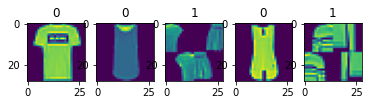

In [33]:
for i in range(1,6):
  ax = plt.subplot(1, 5, i)
  ax.imshow(X[i])
  ax.set_title(Y[i])

plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(len(X_train))
print(len(X_test))

52500
17500


In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [47]:
print(Y_train.shape)

(52500,)


In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Dropout, Input, MaxPool2D, Reshape, Flatten

model = Sequential()

model.add(Input(shape=(28, 28)))
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(10, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(10, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(10, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(10, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 10)        910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 10)        910       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 10)         

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [56]:
model.fit(X_train, Y_train, epochs=20, batch_size=5000)

Epoch 1/20
11/11 [==============================] - 41s 4s/step - loss: 9.4592 - acc: 0.7117
Epoch 2/20
11/11 [==============================] - 41s 4s/step - loss: 1.6603 - acc: 0.8678
Epoch 3/20
11/11 [==============================] - 41s 4s/step - loss: 0.8720 - acc: 0.8742
Epoch 4/20
11/11 [==============================] - 41s 4s/step - loss: 0.5669 - acc: 0.8912
Epoch 5/20
11/11 [==============================] - 41s 4s/step - loss: 0.4295 - acc: 0.9021
Epoch 6/20
11/11 [==============================] - 41s 4s/step - loss: 0.3592 - acc: 0.9076
Epoch 7/20
11/11 [==============================] - 41s 4s/step - loss: 0.3166 - acc: 0.9131
Epoch 8/20


KeyboardInterrupt: ignored

In [57]:
model.evaluate(X_test, Y_test)

547/547 [==============================] - 9s 16ms/step - loss: 0.2243 - acc: 0.9391


[0.22429035604000092, 0.9390857219696045]

In [0]:
with open('puzzle_finder.json','w') as f:
  f.write(model.to_json())

model.save_weights('puzzle_finder.h5')